## Demonstrator notebook to analyse Climate DT IFS-NEMO and ICON data


In [1]:
from aqua import Reader
import sys
sys.path.insert(0, '../../')
from atmglobalmean import seasonal_bias

ModuleNotFoundError: No module named 'atmglobalmean'

In [3]:
import sys
sys.path.insert(0, '/users/susayed/AQUA/diagnostics/atmglobalmean')
from aqua import Reader
from atm_global_mean import seasonal_bias


In [7]:
from aqua import catalogue, inspect_catalogue
cat = catalogue()

IFS	fdb-tco399	fdb-long data tco399 grid
	- fdb-long-2d	FDB data tco399 grid
	- fdb-long-3d	FDB data tco399 grid

IFS-NEMO	control-1950-dev	FDB IFS/NEMO tco1279-orca025 control 1950 run
	- hourly-native	hourly data on native grid TCo1279 (about 10km). Contains tprate(260048), 2t(167), 10u(165), 10v(166), 100u(228246), 100v(228247), sr(173), blh(159), 2d(168), skt(235), chnk(148). See fix yaml for derived vars.
	- hourly-1deg	hourly data on r100 grid. Contains tprate(260048), sf(144), 2t(167), 10u(165), blh(159), sshf(146), slhf(147), ssrd(169), ssr(176), strd(175), str(177), ttr(179), e(182), tsr(178), ewss(180), nsss(181), chnk(148), sro(8), ssro(9). See fix yaml for derived vars.
	- 6hourly-1deg	6hourly data on r100 grid. Contains z(129).
	- monthly-1deg-2d	monthly data on r100 grid. Contains tcc(164), sd(141), tciw(79), tclw(78), msl(151), tcwv(137), lcc(186), mcc(187), hcc(188).
	- monthly-1deg-3d	monthly data on r100 grid. Contains u(131), v(132), t(130), r(157), q(133).
	- lra-r1

## IFS-NEMO

### Starting with the comparison of IFS-NEMO historical experiment vs. ERA5

We are loading the datasets using the AQUA Reader functionality:

In [8]:
# Loading ERA5 data
reader_era5 = Reader(model="ERA5", exp="era5", source="monthly")
data_era5 = reader_era5.retrieve()

# Loading IFS-NEMO historcal data
reader_ifs_nemo_historical = Reader(model = 'IFS-NEMO', exp = 'historical-1990', source = 'lra-r100-monthly')
data_ifs_nemo_historical = reader_ifs_nemo_historical.retrieve()

# Loading IFS-NEMO scenatio data
reader_ifs_nemo_ssp370 = Reader(model = 'IFS-NEMO', exp = 'ssp370', source = 'lra-r100-monthly')
data_ifs_nemo_ssp370 = reader_ifs_nemo_ssp370.retrieve()

2024-04-09 16:53:59 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets
2024-04-09 16:54:03 :: eccodes :: WARNING  -> ShortName tcc has multiple grib codes associated: ['228164', '164']
2024-04-09 16:54:03 :: eccodes :: WARNING  -> AQUA will take the first so that tcc -> 228164, please set up a correct fix if this does not look right
2024-04-09 16:54:03 :: eccodes :: WARNING  -> ShortName lcc has multiple grib codes associated: ['3073', '186']
2024-04-09 16:54:03 :: eccodes :: WARNING  -> AQUA will take the first so that lcc -> 3073, please set up a correct fix if this does not look right
2024-04-09 16:54:03 :: eccodes :: WARNING  -> ShortName mcc has multiple grib codes associated: ['3074', '187']
2024-04-09 16:54:03 :: eccodes :: WARNING  -> AQUA will take the first so that mcc -> 3074, please set up a correct fix if this does not look right
2024-04-09 16:54:03 :: eccodes :: WARNING  -

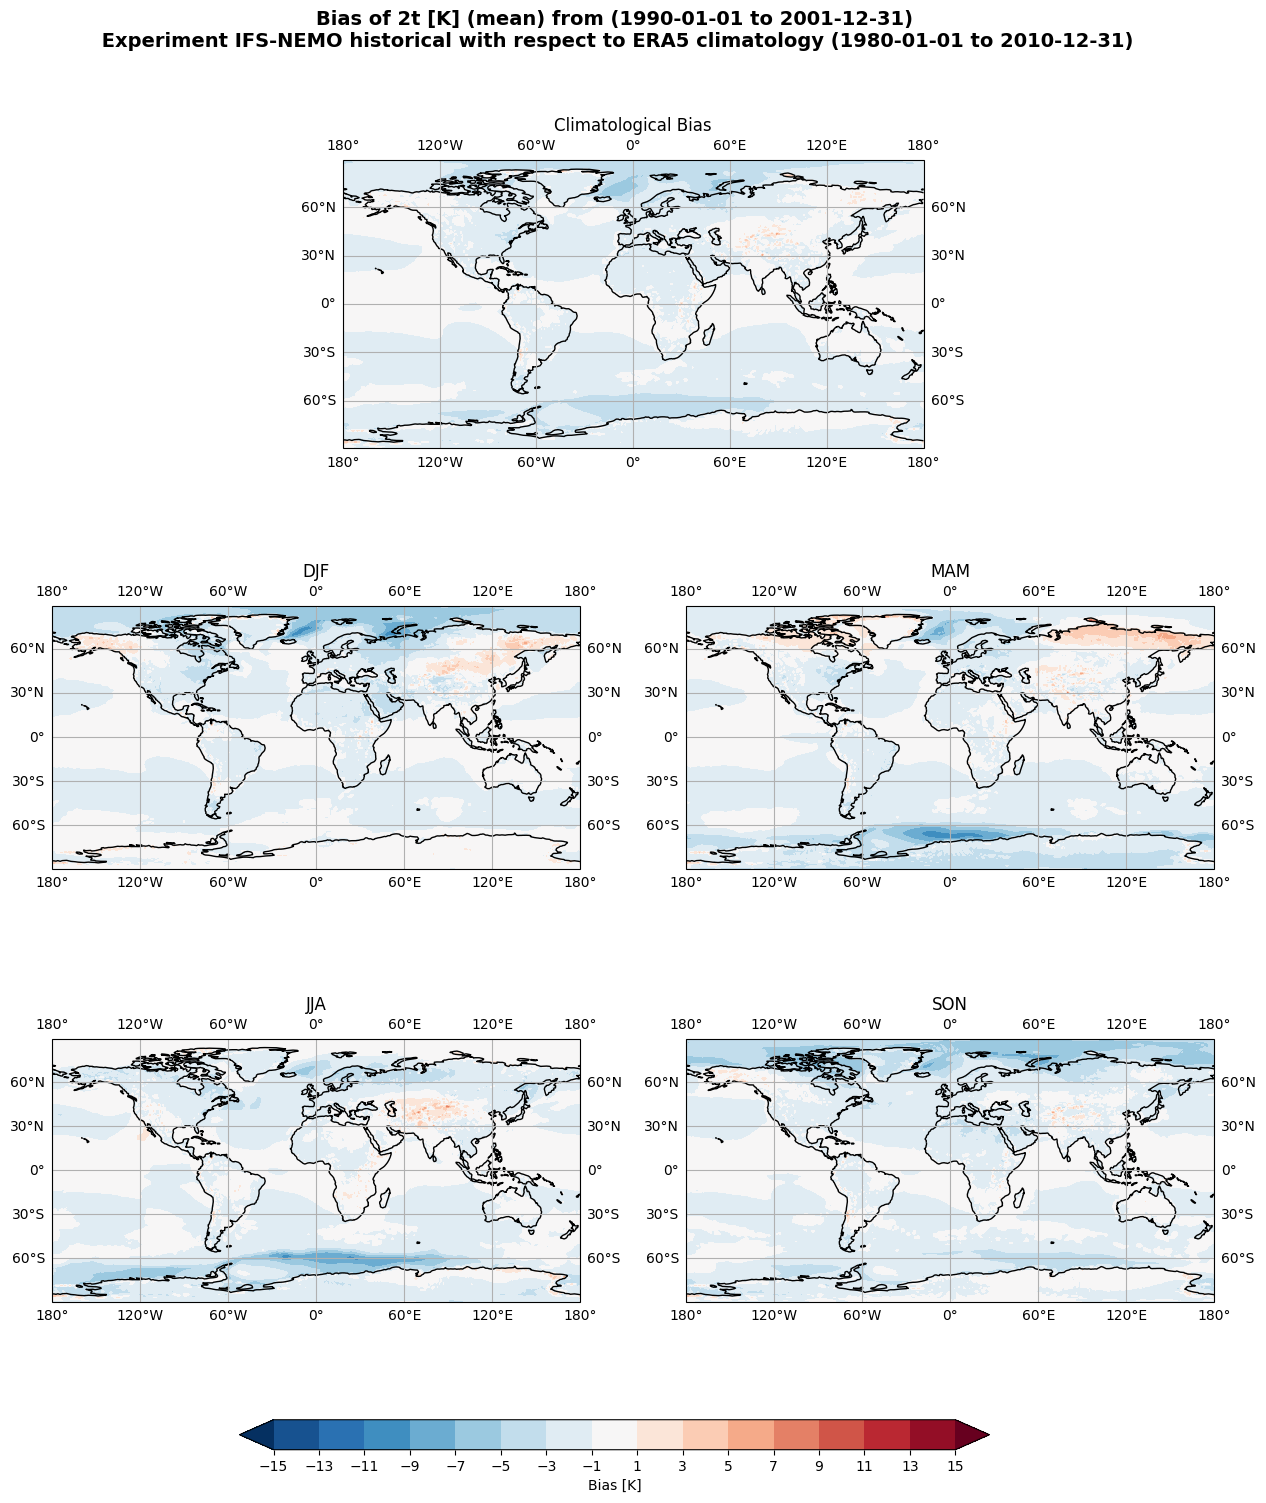

In [11]:
seasonal_bias(
    dataset1=data_ifs_nemo_historical,
    dataset2=data_era5,
    var_name='2t',
    plev=None,
    model_label1='IFS-NEMO historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2001-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    vmin=-15,
    vmax=15,
    nlevels=16
    )

### Difference plots of the scenario experiment ssp370 wrt to the historical experiment

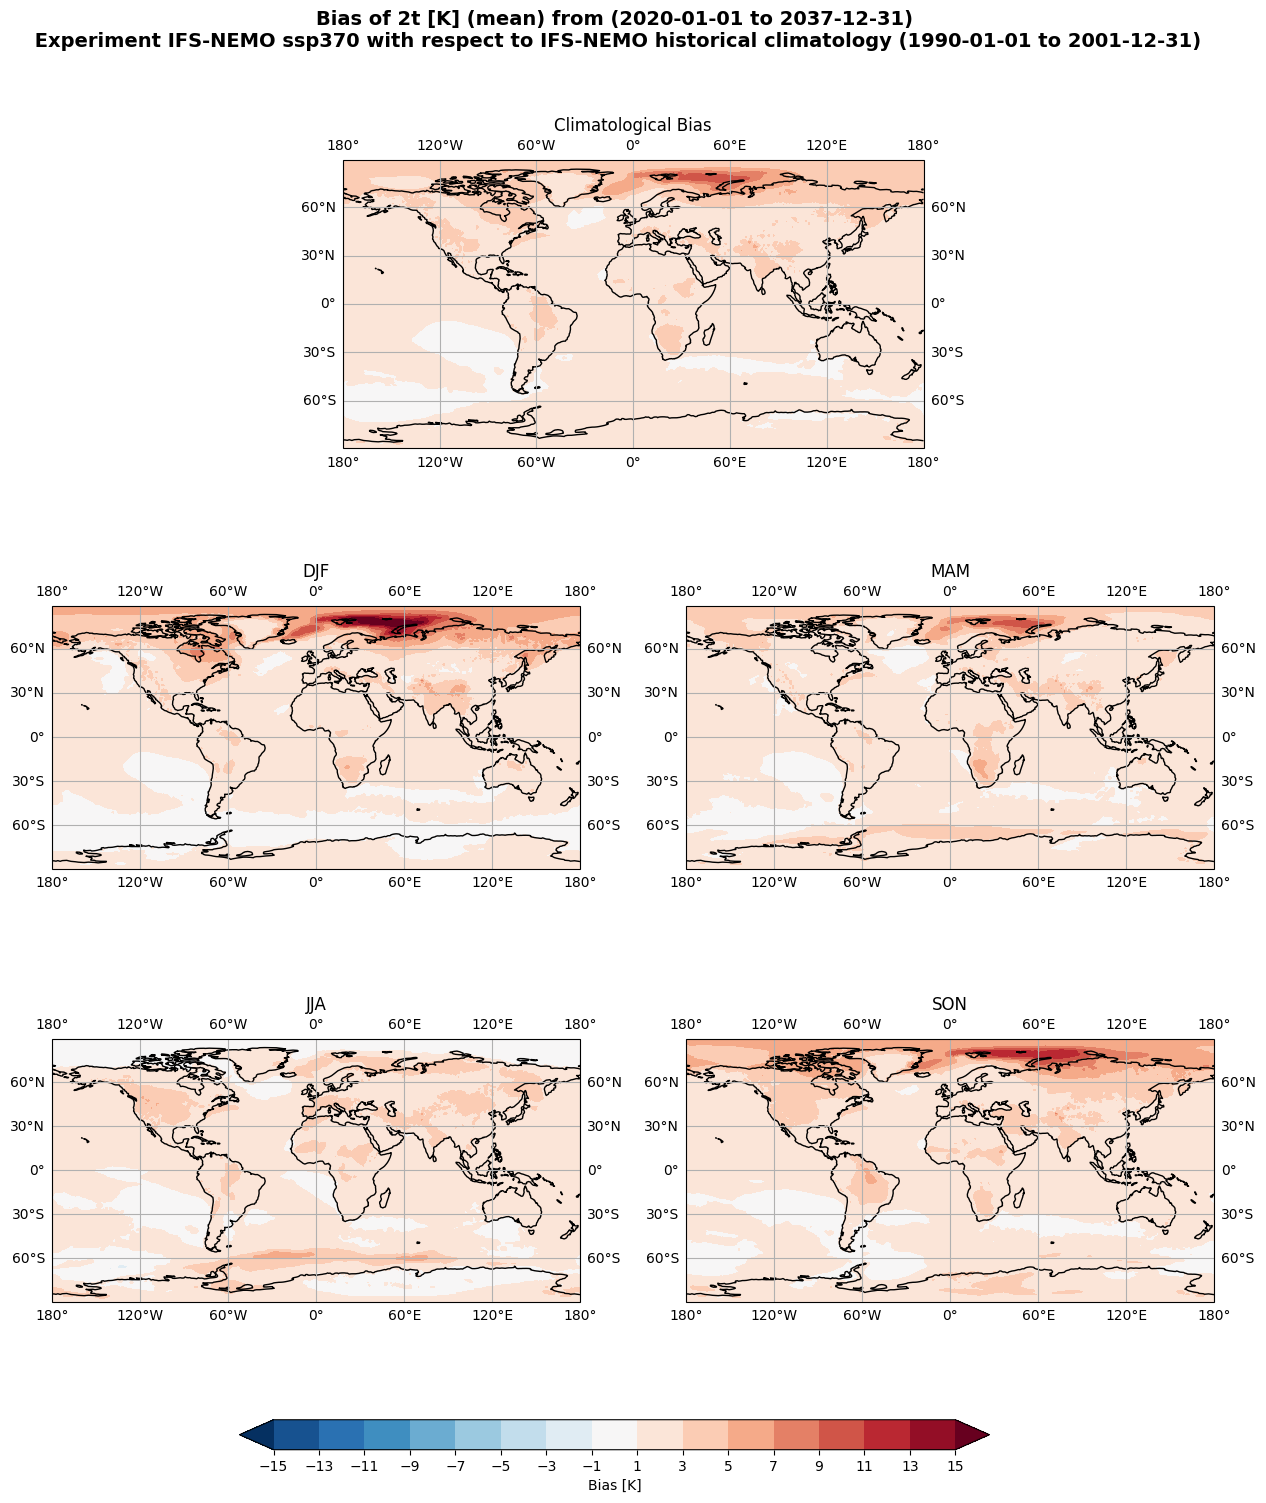

In [12]:
seasonal_bias(
    dataset1=data_ifs_nemo_ssp370,
    dataset2=data_ifs_nemo_historical,
    var_name='2t',
    plev=None,
    model_label1='IFS-NEMO ssp370',
    model_label2='IFS-NEMO historical',
    start_date1 ='2020-01-01',
    end_date1 ='2037-12-31',
    start_date2 ='1990-01-01',
    end_date2 ='2001-12-31',
    vmin=-15,
    vmax=15,
    nlevels=16
    )

## ICON

### Starting with the comparison of ICON historical experiment vs. ERA5

In [14]:
# Loading ICON historcal data
reader_icon_historical = Reader(model = 'ICON', exp = 'historical-1990', source = 'lra-r100-monthly')
data_icon_historical = reader_icon_historical.retrieve()

# Loading ICON scenario data
reader_icon_ssp370 = Reader(model = 'ICON', exp = 'ssp370', source = 'lra-r100-monthly')
data_icon_ssp370 = reader_icon_ssp370.retrieve()

2024-04-09 17:07:49 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets


2024-04-09 17:09:04 :: Reader :: WARNING  -> DATA_PATH parameter is required but is missing, setting to default /pfs/lustrep3/projappl/project_465000454/data/AQUA/datasets


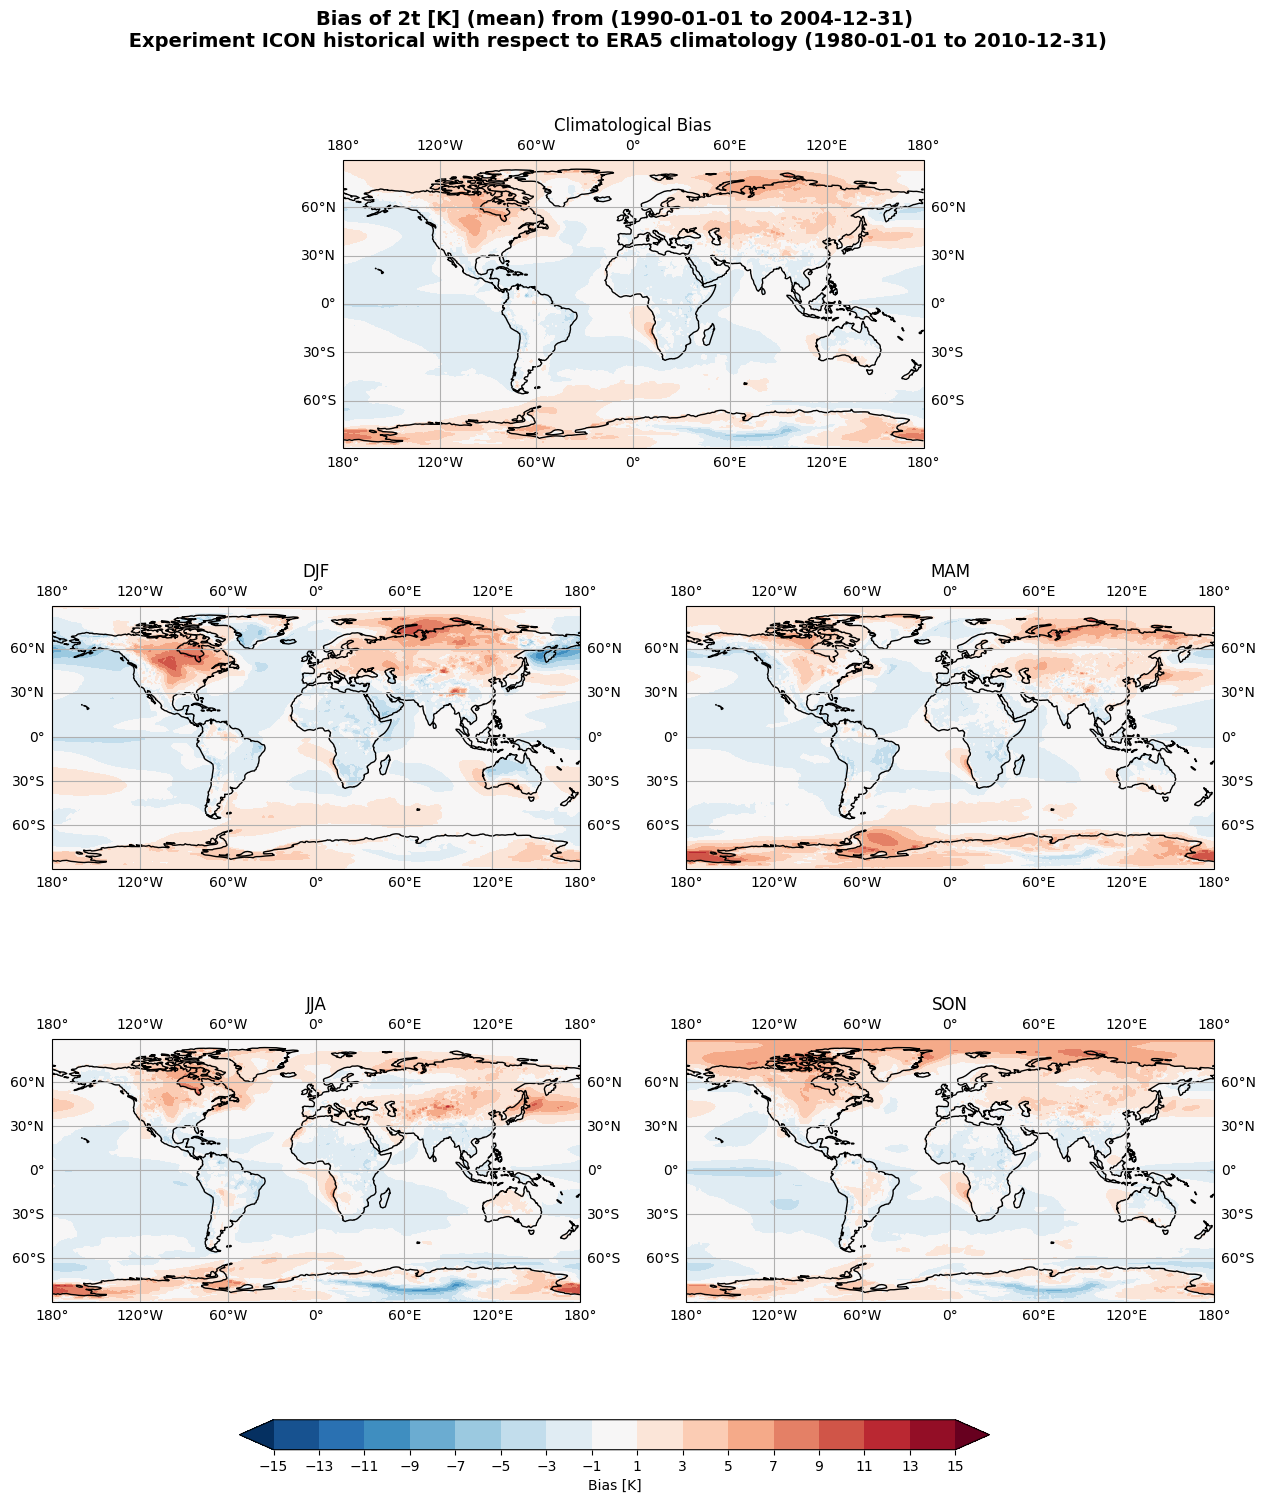

In [16]:
seasonal_bias(
    dataset1=data_icon_historical,
    dataset2=data_era5,
    var_name='2t',
    plev=None,
    model_label1='ICON historical',
    model_label2='ERA5',
    start_date1 ='1990-01-01',
    end_date1 ='2004-12-31',
    start_date2 ='1980-01-01',
    end_date2 ='2010-12-31',
    vmin=-15,
    vmax=15,
    nlevels=16
    )

### Difference plots of the scenario experiment ssp370 wrt to the historical experiment

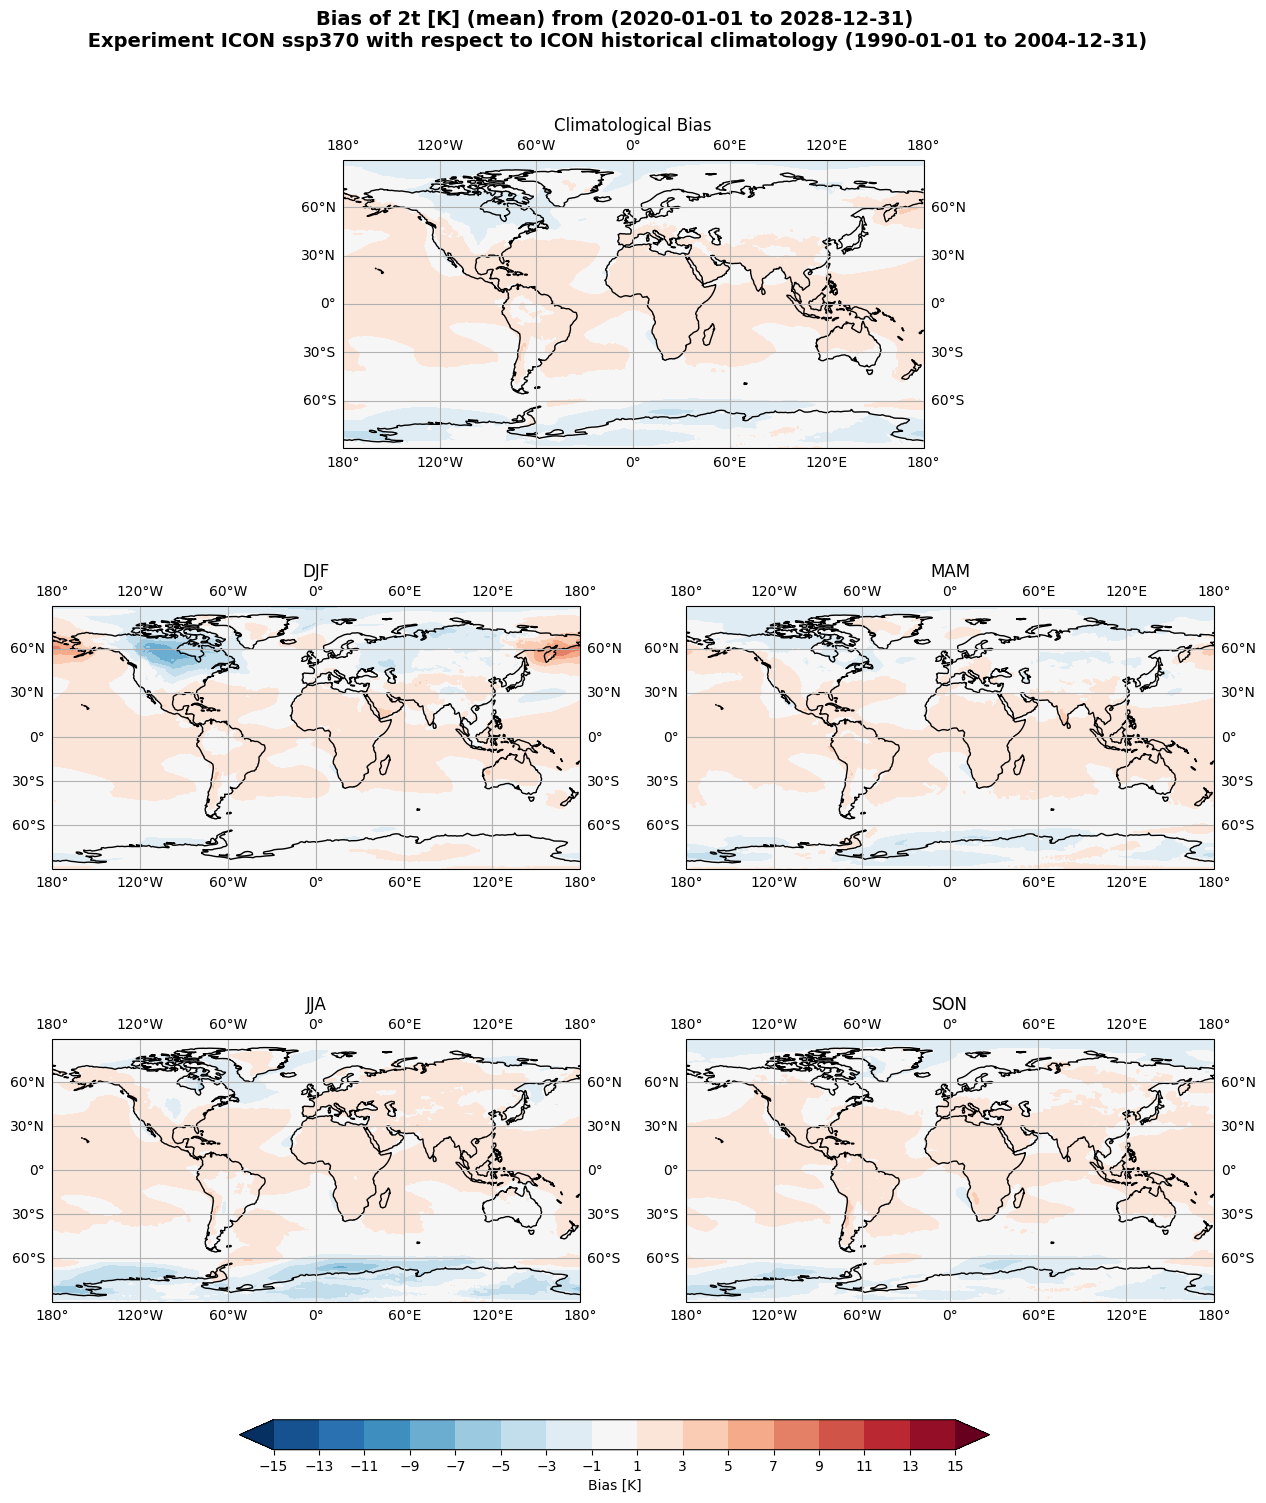

In [20]:
seasonal_bias(
    dataset1=data_icon_ssp370,
    dataset2=data_icon_historical,
    var_name='2t',
    plev=None,
    model_label1='ICON ssp370',
    model_label2='ICON historical',
    start_date1 ='2020-01-01',
    end_date1 ='2028-12-31',
    start_date2 ='1990-01-01',
    end_date2 ='2004-12-31',
    vmin=-15,
    vmax=15,
    nlevels=16
    )